In [1]:
cd /home/ubuntu/StyleTransfer/notebooks/covid_xray/Dataset/Train/Covid

/home/ubuntu/StyleTransfer/notebooks/covid_xray/Dataset/Train/Covid


In [2]:
ls

01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
1-s2.0-S0140673620303706-fx1_lrg.jpg
1-s2.0-S0929664620300449-gr2_lrg-a.jpg
1-s2.0-S0929664620300449-gr2_lrg-b.jpg
1-s2.0-S0929664620300449-gr2_lrg-c.jpg
1-s2.0-S0929664620300449-gr2_lrg-d.jpg
1-s2.0-S1684118220300608-main.pdf-001.jpg
1-s2.0-S1684118220300608-main.pdf-002.jpg
1-s2.0-S1684118220300682-main.pdf-002-a1.png
1-s2.0-S1684118220300682-main.pdf-002-a2.png
1-s2.0-S1684118220300682-main.pdf-003-b1.png
1-s2.0-S1684118220300682-main.pdf-003-b2.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
1.CXRCTThoraximagesofCOVID-19fro

In [ ]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('covid_xray')

In [3]:
import datajoint as dj
import requests
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

In [7]:
dj.conn()

DataJoint connection (connected) root@localhost:3306

In [8]:
import os
covid_xray = os.listdir()

In [9]:
covid_xray

['extubation-1.jpg',
 'gr1_lrg-b.jpg',
 'ryct.2020200034.fig5-day0.jpeg',
 '16664_1_1.jpg',
 'covid-19-pneumonia-58-day-3.jpg',
 '85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg',
 'FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg',
 'ryct.2020200034.fig2.jpeg',
 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 '23E99E2E-447C-46E5-8EB2-D35D12473C39.png',
 'covid-19-pneumonia-28.png',
 'covid-19-pneumonia-34.png',
 'covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png',
 'extubation-8.jpg',
 '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg',
 '53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg',
 '16654_1_1.png',
 'AR-2.jpg',
 'B2D20576-00B7-4519-A415-72DE29C90C34.jpeg',
 'nejmoa2001191_f3-PA.jpeg',
 '1-s2.0-S1684118220300682-main.pdf-003-b2.png',
 '4-x-day1.jpg',
 'covid-19-pneumonia-bilateral.jpg',
 '16663_1_1.jpg',
 '88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg',
 '9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg',
 'kjr-21-e25-g001-l-a.jpg',
 'extubation-13.jpg',
 'radiol.2020200490.

In [10]:
covid_xray_content = {k: v for k, v in enumerate(covid_xray)}

In [11]:
covid_xray_content

{0: 'extubation-1.jpg',
 1: 'gr1_lrg-b.jpg',
 2: 'ryct.2020200034.fig5-day0.jpeg',
 3: '16664_1_1.jpg',
 4: 'covid-19-pneumonia-58-day-3.jpg',
 5: '85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg',
 6: 'FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg',
 7: 'ryct.2020200034.fig2.jpeg',
 8: 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 9: '23E99E2E-447C-46E5-8EB2-D35D12473C39.png',
 10: 'covid-19-pneumonia-28.png',
 11: 'covid-19-pneumonia-34.png',
 12: 'covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png',
 13: 'extubation-8.jpg',
 14: '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg',
 15: '53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg',
 16: '16654_1_1.png',
 17: 'AR-2.jpg',
 18: 'B2D20576-00B7-4519-A415-72DE29C90C34.jpeg',
 19: 'nejmoa2001191_f3-PA.jpeg',
 20: '1-s2.0-S1684118220300682-main.pdf-003-b2.png',
 21: '4-x-day1.jpg',
 22: 'covid-19-pneumonia-bilateral.jpg',
 23: '16663_1_1.jpg',
 24: '88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg',
 25: '9C34AF49-E589-44D5-9

In [12]:
schema = dj.schema('covid_xray_content')

In [13]:
Covid_Xray()

NameError: name 'Covid_Xray' is not defined

In [14]:
@schema
class Covid_Xray(dj.Lookup):
    definition = """
    #Covid
    id :  varchar(3)
    ---
    image_nm : char(100)
    """
    contents = covid_xray_content.items()

In [15]:
Covid_Xray.drop()

DataJointError: Found a part table `covid_xray_content`.`__x_ray__hue` without its master table.

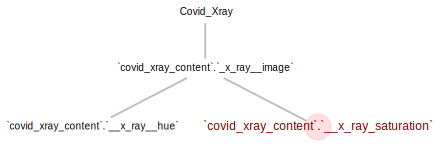

In [16]:
dj.Diagram(schema)

In [17]:
@schema
class XRay_Image(dj.Imported):
    definition = """
    -> Covid_Xray
    ---
    xray_image : longblob    
    """
    
    url_template = ""
    
    def make(self, key):
        # fetch data upstream
        image_nm = (Covid_Xray & key).fetch1('image_nm')
        
        # compute
        url = image_nm
        print(url)
        temp_file = 'tmp.jpg'
        with open(url, 'rb') as f:
            data = f.read()
            
        with open(temp_file, 'wb') as f:
            f.write(data)
        
        # insert into self
        self.insert1(dict(key, xray_image=plt.imread(temp_file)))

In [18]:
XRay_Image().populate(display_progress=True, suppress_errors=True)

XRay_Image: 0it [00:00, ?it/s]


[]

In [19]:
XRay_Image()

id,xray_image
0,=BLOB=
1,=BLOB=
10,=BLOB=
100,=BLOB=
101,=BLOB=
102,=BLOB=
103,=BLOB=
104,=BLOB=
105,=BLOB=
106,=BLOB=


In [20]:
XRay_Image.drop()

DataJointError: Found a part table `covid_xray_content`.`__x_ray__hue` without its master table.

In [21]:
img = (XRay_Image & {'id': "2"}).fetch1('xray_image')

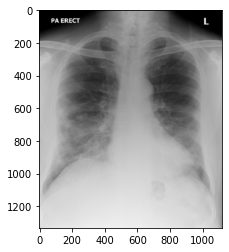

In [22]:
plt.imshow(img)

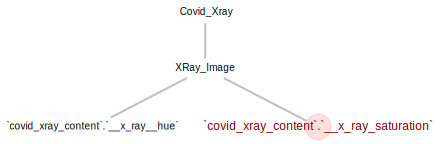

In [23]:
dj.Diagram(schema)

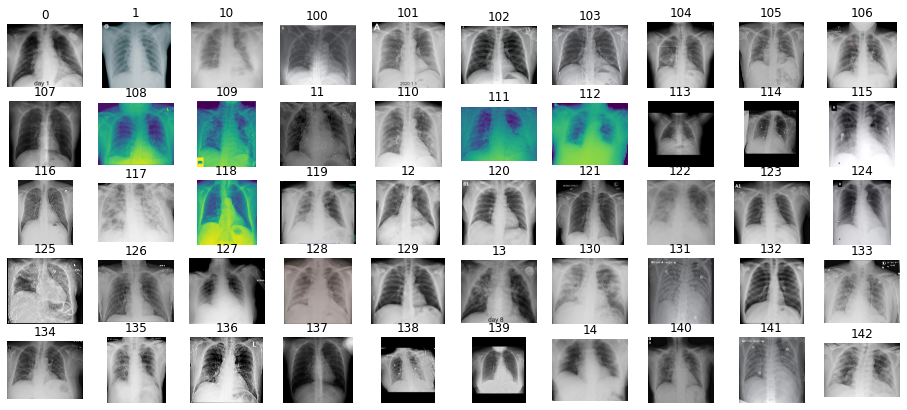

In [24]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (XRay_Image*Covid_Xray).fetch(as_dict=True)):
    ax.imshow(info['xray_image'])
    ax.set_title(info['id'])
    ax.axis(False)

In [25]:
@schema
class XRaySaturation(dj.Computed):
    definition = """
    -> XRay_Image
    ---
    saturation :  float 
    """
    
    def make(self, key):
        img = (XRay_Image & key).fetch1('xray_image')
        avg_color = img.mean(axis=(0,1))
        sat = avg_color.max()/avg_color.sum()
        self.insert1(dict(key, saturation=sat))

In [26]:
Covid_Xray * XRay_Image

id,image_nm,xray_image
0,extubation-1.jpg,=BLOB=
1,gr1_lrg-b.jpg,=BLOB=
10,covid-19-pneumonia-28.png,=BLOB=
100,nejmc2001573_f1b.jpeg,=BLOB=
101,nCoV-radiol.2020200269.fig1-day7.jpeg,=BLOB=
102,nejmoa2001191_f1-PA.jpeg,=BLOB=
103,nejmoa2001191_f4.jpeg,=BLOB=
104,fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png,=BLOB=
105,1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg,=BLOB=
106,16672_1_1.jpg,=BLOB=


In [27]:
XRaySaturation.populate()

In [28]:
XRaySaturation()

id,saturation
0,0.333402
1,0.35436
10,0.333333
100,0.33993
101,0.333333
102,0.335152
103,0.339081
104,0.333333
105,0.333333
106,0.333613


In [1]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (Covid_Xray*XRay_Image*XRaySaturation).fetch()):
    ax.imshow(info['xray_image'])
    ax.set_title(info['id'])
    ax.axis(False)

NameError: name 'plt' is not defined

In [ ]:
Covid_Xray()